Let's begin. goodreads_library_export.csv contains the data. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')


In [2]:
df = pd.read_csv('goodreads_library_export.csv')
print("Shape of the dataset:", df.shape)
print("Columns in the dataset:", df.columns.tolist())
print("Dataset info:")
df.info()

Shape of the dataset: (2610, 24)
Columns in the dataset: ['Book Id', 'Title', 'Author', 'Author l-f', 'Additional Authors', 'ISBN', 'ISBN13', 'My Rating', 'Average Rating', 'Publisher', 'Binding', 'Number of Pages', 'Year Published', 'Original Publication Year', 'Date Read', 'Date Added', 'Bookshelves', 'Bookshelves with positions', 'Exclusive Shelf', 'My Review', 'Spoiler', 'Private Notes', 'Read Count', 'Owned Copies']
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Book Id                     2610 non-null   int64  
 1   Title                       2610 non-null   object 
 2   Author                      2610 non-null   object 
 3   Author l-f                  2610 non-null   object 
 4   Additional Authors          815 non-null    object 
 5   ISBN                        2610 non-null   object

In [3]:
# Inspecting the dataset 
print("First few rows")
display(df.head())

First few rows


,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,Binding,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Bookshelves,Bookshelves with positions,Exclusive Shelf,My Review,Spoiler,Private Notes,Read Count,Owned Copies
0,893590,"Diamond Dogs, Turquoise Days",Alastair Reynolds,"Reynolds, Alastair",NaN,"=""0575075163""","=""9780575075160""",0,4.00,Gollancz,Paperback,231.0,2003.0,2001.0,NaN,2025/05/02,"currently-reading, science-fiction, fiction","currently-reading (#1), science-fiction (#297)...",currently-reading,NaN,NaN,NaN,1,0
1,8444621,Through the Language Glass: Why the World Look...,Guy Deutscher,"Deutscher, Guy",NaN,"=""080508195X""","=""9780805081954""",3,3.91,Metropolitan Books,Hardcover,304.0,2010.0,2010.0,2025/08/05,2025/02/19,NaN,NaN,read,NaN,NaN,NaN,1,0
2,56769571,Damascus Station,David McCloskey,"McCloskey, David",NaN,"=""0393881040""","=""9780393881042""",2,4.17,W. W. Norton & Company,Hardcover,432.0,2021.0,2021.0,2025/07/29,2025/03/09,NaN,NaN,read,"interesting modern espionage thriller, it was ...",NaN,NaN,1,0
3,1455439,Nightside the Long Sun (The Book of the Long S...,Gene Wolfe,"Wolfe, Gene",NaN,"=""0812516257""","=""9780812516258""",1,4.08,Tor Books,Mass Market Paperback,333.0,1993.0,1993.0,2025/07/24,2013/07/06,"fiction, pretentious, science-fiction","fiction (#319), pretentious (#5), science-fict...",read,The cranial fissure that appeared over the cou...,NaN,NaN,1,0
4,29397486,Conclave,Robert Harris,"Harris, Robert",NaN,"=""""","=""""",0,4.11,Cornerstone Digital,ebook,288.0,2016.0,2016.0,NaN,2025/07/22,to-read,to-read (#281),to-read,NaN,NaN,NaN,0,0


In [4]:

print("Missing values")
display(df.isnull().sum())

Missing values


Book Id                          0
Title                            0
Author                           0
Author l-f                       0
Additional Authors            1795
ISBN                             0
ISBN13                           0
My Rating                        0
Average Rating                   0
Publisher                       79
Binding                         24
Number of Pages                 69
Year Published                  63
Original Publication Year      103
Date Read                     1226
Date Added                       0
Bookshelves                    686
Bookshelves with positions     686
Exclusive Shelf                  0
My Review                     2256
Spoiler                       2577
Private Notes                 2609
Read Count                       0
Owned Copies                     0
dtype: int64

In [5]:
print("\nBasic statistics:")
display(df.describe())


Basic statistics:


,Book Id,My Rating,Average Rating,Number of Pages,Year Published,Original Publication Year,Read Count,Owned Copies
count,2.610000e+03,2610.000000,2610.000000,2541.000000,2547.000000,2507.000000,2610.000000,2610.0
mean,2.159522e+07,1.827203,4.115195,328.272334,2009.906164,1995.036298,0.915326,0.0
std,3.217598e+07,1.553575,0.386373,285.165621,8.913977,119.901499,0.352556,0.0
min,3.000000e+00,0.000000,0.000000,0.000000,1925.000000,-1200.000000,0.000000,0.0
25%,8.248418e+05,0.000000,3.950000,197.000000,2005.000000,2000.000000,1.000000,0.0
50%,1.220052e+07,2.000000,4.170000,257.000000,2011.000000,2009.000000,1.000000,0.0
75%,3.012078e+07,3.000000,4.350000,400.000000,2016.000000,2015.000000,1.000000,0.0
max,2.338000e+08,5.000000,5.000000,9707.000000,2026.000000,2026.000000,4.000000,0.0


In [6]:
print("\nUnique values in key columns:")
for col in ['Exclusive Shelf', 'My Rating', 'Bookshelves']:
    print(f"\n{col}:")
    display(df[col].value_counts())


Unique values in key columns:

Exclusive Shelf:


Exclusive Shelf
read                 2317
to-read               280
abandoned              12
currently-reading       1
Name: count, dtype: int64


My Rating:


My Rating
0    869
3    653
2    400
4    362
1    267
5     59
Name: count, dtype: int64


Bookshelves:


Bookshelves
manga                                   702
to-read                                 280
science-fiction                         224
fantasy                                 224
fiction                                 166
                                       ... 
abandoned, rubbish, fiction               1
popular-science, science-fiction          1
fiction, abandoned                        1
paranormal, fiction                       1
fiction, fantasy, historical-fiction      1
Name: count, Length: 132, dtype: int64

In [7]:
# read books only

read_books_df = df[df['Exclusive Shelf'] == 'read']
print("\nShape of read books dataset:", read_books_df.shape)


Shape of read books dataset: (2317, 24)


Rating Distribution


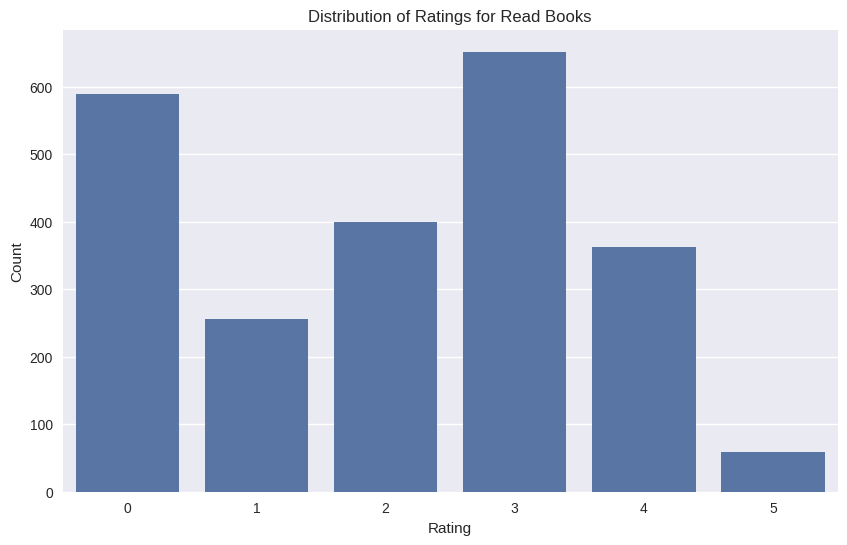


Total read books: 2317
Books with ratings: 1728

Rating statistics:


count    1728.000000
mean        2.750579
std         1.052611
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: My Rating, dtype: float64


Most common genres in read books:


manga                 702
fantasy               319
fiction               317
science-fiction       292
mystery                67
historical-fiction     64
popular-science        39
light-novel            27
rubbish                23
suspense               20
Name: count, dtype: int64


Average ratings by genre (minimum 10 books):


rating      
                        mean count
genre                             
manga               2.853933   356
fantasy             2.769231   312
fiction             2.392283   311
science-fiction     3.121528   288
historical-fiction  2.639344    61
mystery             2.897959    49
popular-science     3.179487    39
light-novel         2.961538    26
rubbish             1.130435    23
cozy                3.166667    18
paranormal          2.562500    16
suspense            3.250000    16
non-fiction         3.083333    12
wholesome           3.500000    10

In [8]:
# Rating distribution visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=read_books_df, x='My Rating')
plt.title('Distribution of Ratings for Read Books')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Average rating statistics
read_ratings = read_books_df[read_books_df['My Rating'] > 0]
print(f"\nTotal read books: {len(read_books_df)}")
print(f"Books with ratings: {len(read_ratings)}")
print("\nRating statistics:")
display(read_ratings['My Rating'].describe())

# Genre analysis from Bookshelves for read books
genres = read_books_df[read_books_df['Bookshelves'].notna()]['Bookshelves'].str.split(', ', expand=True)
genre_counts = pd.Series([x for l in genres.values.flatten() if isinstance(l, str) for x in l.split(', ')]).value_counts()

print("\nMost common genres in read books:")
display(genre_counts.head(10))

# Genre ratings
def get_genre_ratings(df):
    genre_ratings = []
    for idx, row in df.iterrows():
        if pd.notna(row['Bookshelves']) and row['My Rating'] > 0:
            genres = row['Bookshelves'].split(', ')
            for genre in genres:
                genre_ratings.append({'genre': genre, 'rating': row['My Rating']})
    return pd.DataFrame(genre_ratings)

genre_ratings = get_genre_ratings(read_books_df)
genre_avg = genre_ratings.groupby('genre').agg({
    'rating': ['mean', 'count']
}).sort_values(('rating', 'count'), ascending=False)
genre_avg = genre_avg[genre_avg['rating']['count'] >= 10]  # Only genres with at least 10 books

print("\nAverage ratings by genre (minimum 10 books):")
display(genre_avg)

In [9]:
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer

mlb = MultiLabelBinarizer()
book_genres = read_books_df['Bookshelves'].fillna('').str.split(', ')
genre_features = pd.DataFrame(mlb.fit_transform(book_genres), columns=mlb.classes_, index=read_books_df.index)

# Create feature matrix and handle authors
features = pd.DataFrame(index=read_books_df.index)
author_encoder = LabelEncoder()
encoded_authors = author_encoder.fit_transform(read_books_df['Author'].fillna('Unknown Author'))
features['Author'] = encoded_authors

features['Year Published'] = read_books_df['Year Published']
features['Number of Pages'] = read_books_df['Number of Pages']

features = pd.concat([features, genre_features], axis=1)

features = features.fillna({
    'Number of Pages': 0,
    'Year Published': 2000
})


print("Number of NaN values:", features['Author'].isna().sum().sum())
print("Feature matrix shape:", features.shape)
print("\nFeature columns:", features.columns[:10].tolist(), "...")

display(features)

Number of NaN values: 0
Feature matrix shape: (2317, 26)

Feature columns: ['Author', 'Year Published', 'Number of Pages', '', 'confusing', 'cozy', 'fantasy', 'fiction', 'historical-fiction', 'history'] ...


,Author,Year Published,Number of Pages,,confusing,cozy,fantasy,fiction,historical-fiction,history,horror,isekai,light-novel,manga,mystery,non-fiction,paranormal,popular-science,pretentious,rubbish,science-fiction,suspense,travelogue,visual-novel,wholesome,young-adult
1,202,2010.0,304.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,133,2021.0,432.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,194,1993.0,333.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
5,236,2021.0,263.0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
6,574,2024.0,480.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2605,560,1997.0,498.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2606,560,2007.0,610.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2607,563,2005.0,128.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2608,327,2003.0,654.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [10]:
# Prepare training data

training_X = features.copy()  # This is the feature set, the 'input' so to speak. Could add more kinds of features later like sentiment?
training_Y = read_books_df['My Rating']  # this is the target to predict

# Remove where rating = 0, or only include where books have ratings
training_X = training_X[training_Y > 0]
training_Y = training_Y[training_Y > 0]

print("Training data shape:", training_X.shape)
print("Number of rated books:", len(training_Y))




Training data shape: (1728, 26)
Number of rated books: 1728


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train, X_test, Y_train, Y_text = train_test_split(training_X, training_Y, test_size=0.2, random_state=23498234)


Mean Squared Error: 0.8803814363776367
Mean Absolute Error: 0.729168237911735


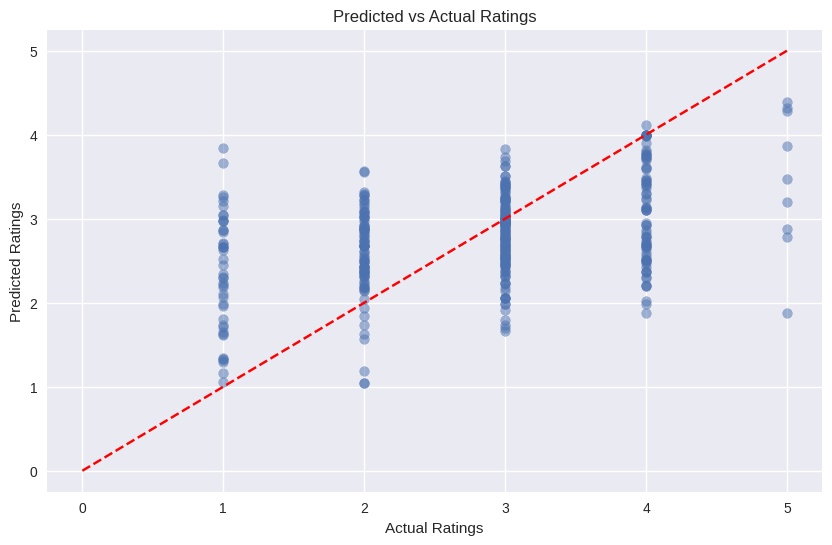

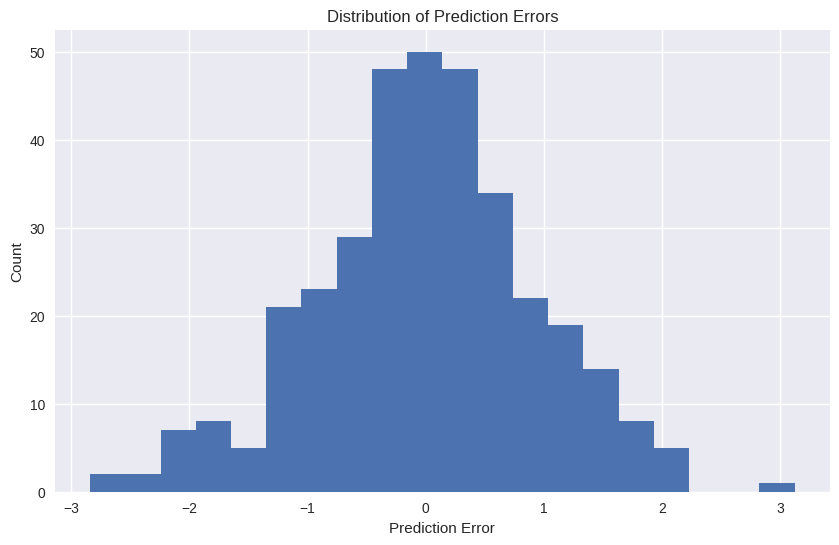

In [12]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=128383)

random_forest_model.fit(X_train, Y_train)

Y_predicted = random_forest_model.predict(X_test)

mse = mean_squared_error(Y_text, Y_predicted)
mae = mean_absolute_error(Y_text, Y_predicted)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

plt.figure(figsize=(10, 6))
plt.scatter(Y_text, Y_predicted, alpha=0.5)
plt.plot([0, 5], [0, 5], 'r--')  # Perfect prediction line
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Predicted vs Actual Ratings')
plt.show()

# Distribution of prediction errors
errors = Y_text - Y_predicted
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.show()

In [13]:

# Feature importance - which were most influential?
feature_importance = pd.DataFrame({
    'feature': training_X.columns,
    'importance': random_forest_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 10 most important features:")
display(feature_importance.head(10))


Top 10 most important features:


,feature,importance
2,Number of Pages,0.309037
0,Author,0.292821
1,Year Published,0.205235
19,rubbish,0.035275
20,science-fiction,0.028622
7,fiction,0.027266
13,manga,0.024241
6,fantasy,0.016274
3,,0.011920
17,popular-science,0.010506


In [19]:
# Get unread books (to-read shelf)
to_read = df[df['Exclusive Shelf'] == 'to-read']

to_read.loc[:, 'Bookshelves'] = to_read['Bookshelves'].str.replace('to-read, ', '').str.replace('to-read', '')

# Prepare features for unread books
to_read_features = pd.DataFrame()

all_authors = pd.concat([read_books_df['Author'], to_read['Author']]).unique()
author_encoder.fit(all_authors)

to_read_features['Author'] = author_encoder.transform(to_read['Author'].fillna('Unknown Author'))
to_read_features['Year Published'] = to_read['Year Published']
to_read_features['Number of Pages'] = to_read['Number of Pages']

# Get genres for unread books
unread_genres = to_read['Bookshelves'].fillna('').str.split(', ')
unread_genre_features = pd.DataFrame(
    mlb.transform(unread_genres), 
    columns=mlb.classes_,
    index=to_read.index
)

# Combine features
to_read_features = pd.concat([to_read_features, unread_genre_features], axis=1)
to_read_features = to_read_features.fillna({
    'Number of Pages': 0,
    'Year Published': 2000
})


In [30]:
# Get unread books (to-read shelf)
to_read = df[df['Exclusive Shelf'] == 'to-read'].copy()
to_read.loc[:, 'Bookshelves'] = to_read['Bookshelves'].str.replace('to-read, ', '').str.replace('to-read', '')

to_read_features = pd.DataFrame(index=to_read.index)

all_authors = pd.concat([read_books_df['Author'], to_read['Author']]).unique()
author_encoder.fit(all_authors)
to_read_features['Author'] = author_encoder.transform(to_read['Author'].fillna('Unknown Author'))

to_read_features['Year Published'] = to_read['Year Published']
to_read_features['Number of Pages'] = to_read['Number of Pages']

# Get genres - make sure to use the same index
unread_genres = to_read['Bookshelves'].fillna('').str.split(', ')
unread_genre_features = pd.DataFrame(
    mlb.transform(unread_genres), 
    columns=mlb.classes_,
    index=to_read.index
)

to_read_features = pd.concat([to_read_features, unread_genre_features], axis=1)

# Fill missing values
to_read_features = to_read_features.fillna({
    'Number of Pages': 0,
    'Year Published': 2000
})

# print("Shapes after processing:")
# print("to_read shape:", to_read.shape)
# print("to_read_features shape:", to_read_features.shape)

# Make predictions
predicted_ratings = random_forest_model.predict(to_read_features)
# print("predicted_ratings shape:", predicted_ratings.shape)



human_readable_predictions =  to_read[['Title', 'Author', 'Bookshelves']].copy()
human_readable_predictions['Predicted Rating'] = predicted_ratings

human_readable_predictions['Rating Sentence'] = human_readable_predictions['Predicted Rating'].apply(
    lambda x: "You might like it" if x >= 2.8 else ("It might be okay" if x >= 2.0 else "You probably won't like it")
)

human_readable_predictions = human_readable_predictions.sort_values('Predicted Rating', ascending=False)
print("\nTop 10 recommended books:")
display(human_readable_predictions.head(100))

for idx, prediction in human_readable_predictions.iterrows():
    print(f"{prediction['Title']} by {prediction['Author']}: {prediction['Rating Sentence']} (Predicted Rating: {prediction['Predicted Rating']:.2f})")



Top 10 recommended books:


,Title,Author,Bookshelves,Predicted Rating,Rating Sentence
1778,The Rings of Haven (The Frontiers Saga #2),Ryk Brown,,3.76,You might like it
255,"Off to Be the Wizard (Magic 2.0, #1)",Scott Meyer,,3.66,You might like it
1246,"Knots and Crosses (Inspector Rebus, #1)",Ian Rankin,,3.59,You might like it
875,"Higurashi When They Cry: Beyond Midnight Arc, ...",Ryukishi07,,3.58,You might like it
245,The Metamorphosis of Prime Intellect,Roger Williams,,3.54,You might like it
...,...,...,...,...,...
684,The Calculating Stars (Lady Astronaut Universe...,Mary Robinette Kowal,,2.83,You might like it
237,"A Mouthful of Dust (The Singing Hills Cycle, #6)",Nghi Vo,,2.83,You might like it
713,"She Who Became the Sun (The Radiant Emperor, #1)",Shelley Parker-Chan,,2.83,You might like it
1070,Elysium Fire (Prefect Dreyfus Emergency #2),Alastair Reynolds,,2.82,You might like it


The Rings of Haven (The Frontiers Saga #2) by Ryk Brown: You might like it (Predicted Rating: 3.76)
Off to Be the Wizard (Magic 2.0, #1) by Scott Meyer: You might like it (Predicted Rating: 3.66)
Knots and Crosses (Inspector Rebus, #1) by Ian Rankin: You might like it (Predicted Rating: 3.59)
Higurashi When They Cry: Beyond Midnight Arc, Vol. 1 by Ryukishi07: You might like it (Predicted Rating: 3.58)
The Metamorphosis of Prime Intellect by Roger Williams: You might like it (Predicted Rating: 3.54)
The Relentless Moon (Lady Astronaut Universe, #3) by Mary Robinette Kowal: You might like it (Predicted Rating: 3.53)
Zones of Thought: A Fire Upon the Deep / A Deepness in the Sky by Vernor Vinge: You might like it (Predicted Rating: 3.50)
Forge of Darkness (The Kharkanas Trilogy, #1) by Steven Erikson: You might like it (Predicted Rating: 3.47)
The Gene: An Intimate History by Siddhartha Mukherjee: You might like it (Predicted Rating: 3.43)
A Stranger in Olondria by Sofia Samatar: You migh

In [53]:
def predict_book_rating(title, author, year_published, num_pages, genres):
    book_features = pd.DataFrame(index=[0])
    
    # Handle unknown authors by trying to transform, falling back to 'Unknown Author'
    try:
        book_features['Author'] = author_encoder.transform([author])
    except ValueError:
        book_features['Author'] = author_encoder.transform(['Unknown Author'])
    
    # Rest of the function remains the same
    book_features['Year Published'] = year_published
    book_features['Number of Pages'] = num_pages
    
    known_genres = list(set(genres) & set(mlb.classes_))
    if not known_genres:
        known_genres = [''] 

    genre_features = pd.DataFrame(
        mlb.transform([known_genres]), 
        columns=mlb.classes_,
        index=[0]
    )
    
    book_features = pd.concat([book_features, genre_features], axis=1)
    predicted_rating = random_forest_model.predict(book_features)[0]
    
    return {
        'Title': title,
        'Predicted Rating': predicted_rating,
        'Rating Sentence': "You might like it" if predicted_rating >= 2.8 
                         else ("It might be okay" if predicted_rating >= 2.0 
                         else "You probably won't like it")
    }

# Example usage
test_books = [
    {
        'title': 'Project Hail Mary',
        'author': 'Andy Weir',
        'year': 2021,
        'pages': 496,
        'genres': ['science-fiction', 'fiction']
    },
    {
        'title': '1984',
        'author': 'James Jameson',
        'year': 2022,
        'pages': 328,
        'genres': ['fiction', 'classics', 'dystopian', 'cozy', 'science-fiction']
    }
]

# Get predictions for test books
for book in test_books:
    result = predict_book_rating(
        book['title'],
        book['author'],
        book['year'],
        book['pages'],
        book['genres']
    )
    print(f"\n{result['Title']}:")
    print(f"Predicted Rating: {result['Predicted Rating']:.2f}")
    print(f"Recommendation: {result['Rating Sentence']}")


Project Hail Mary:
Predicted Rating: 3.65
Recommendation: You might like it

1984:
Predicted Rating: 2.78
Recommendation: It might be okay


In [55]:
import joblib

model_data = {
    'model': random_forest_model,
    'author_encoder': author_encoder,
    'genre_encoder': mlb
}

# Save with highest protocol and compressed numpy arrays
joblib.dump(model_data, 'goodreads_model.joblib', 
           compress=('gzip', 3), 
           protocol=4)

['goodreads_model.joblib']